In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_drawParameters(datasets, performance_data,colors,param_values, param_type="Z"):
    """
    绘制消融实验的柱状图对比。

    参数:
    datasets: 字符串列表，数据集名称，定义 X 轴的类别
    performance_data: 嵌套列表，外层列表长度与datasets一致（每个元素对应一个数据集）；内层列表长度与param_values一致（每个元素对应参数的一个取值下的性能值）
    colors: 列表，长度与param_values一致，每个元素为颜色代码
    param_values: 列表，包含参数的所有实验取值
    param_type；表示参数的名称，用于图表标题和图例的命名

    配色：
    colors = [
            (68/255,144/255,196/255),
            (150/255,176/255,221/255),
            (255/255,112/255,112/255),
            (235/255,240/255,249/255),
        ]
    """
    num_params = len(param_values)
    bar_width = 0.15

    # X 位置
    positions = [np.arange(len(datasets))]
    for i in range(1, num_params):
        positions.append([x + bar_width for x in positions[i-1]])

    plt.figure(figsize=(14, 12))

    # 绘制每个参数对应的柱状图
    for i in range(num_params):
        bars = plt.bar(
            positions[i],
            [performance[i] for performance in performance_data],
            color=colors[i],
            width=bar_width,
            edgecolor='grey',
            label=f"{param_type}={param_values[i]}"
        )

        # 添加数值标签
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2,
                     yval + 0.5,
                     f'{yval:.2f}',
                     ha='center', va='bottom', fontsize=20)

    # 设置标题和坐标轴
    plt.title(f'Parameter {param_type} Ablation Study', fontsize=45)
    plt.xlabel('Dataset', fontsize=45)
    plt.ylabel('Performance', fontsize=45)
    plt.xticks([r + bar_width*(num_params-1)/2 for r in range(len(datasets))],
               datasets, fontsize=35)

    # 设置Y轴
    plt.ylim(40, 75)
    plt.yticks(np.arange(40, 76, 5), fontsize=30)

    # 全局字体
    plt.rcParams.update({'font.size': 35})

    # 图例
    plt.legend(fontsize=30, ncol=2 if num_params > 4 else 1)

    # 保存
    plt.savefig("Dropout_Ablation.pdf", dpi=600)

    plt.show()


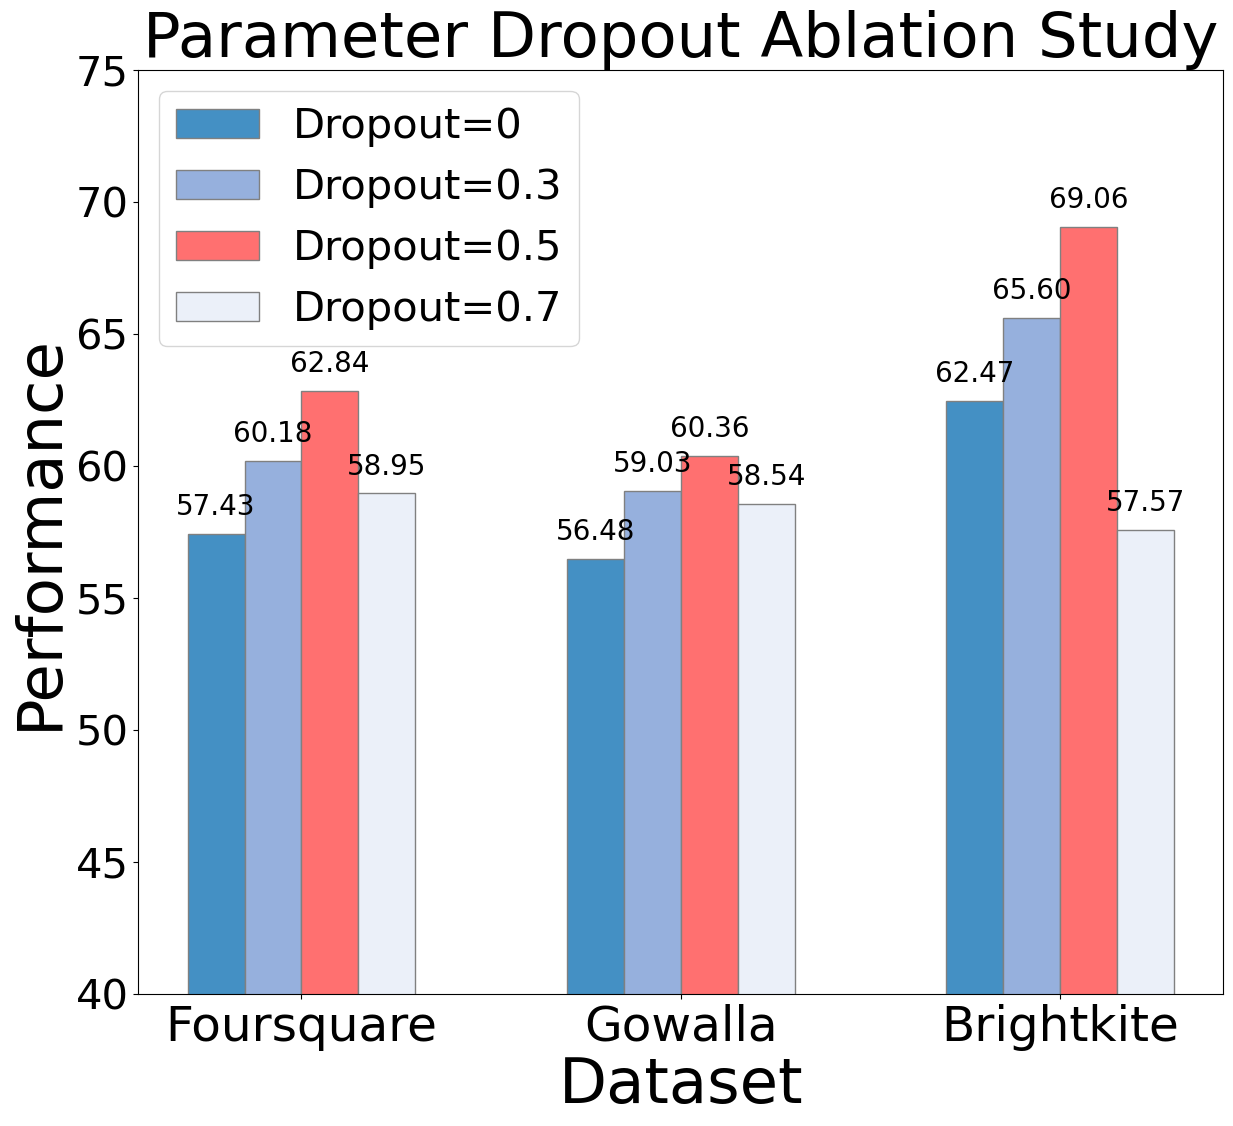

In [5]:
# ===== 示例调用 =====

datasets = ['Foursquare', 'Gowalla', 'Brightkite']

# Dropout 示例数据
performance_dataset1 = [57.43, 60.18, 62.84, 58.95]
performance_dataset2 = [56.48, 59.03, 60.36, 58.54]
performance_dataset3 = [62.47, 65.60, 69.06, 57.57]    
performance_data = [performance_dataset1, performance_dataset2, performance_dataset3]

colors = [
            (68/255,144/255,196/255),
            (150/255,176/255,221/255),
            (255/255,112/255,112/255),
            (235/255,240/255,249/255),
        ]

param_values = [0, 0.3, 0.5, 0.7]

plot_drawParameters(datasets, performance_data, colors,param_values, param_type="Dropout")
